In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import reshape
import pylab

This notebook has three parts:

**Part 1: Load and plot projected water and sediment discharge through 2100**
- Outputs from each climate model are imported into the notebook
- Dataframes are cleaned up
- Data are reshaped to obtain mean annual water and sediment discharge
- Data are plotted 

**Part 2: Calculate average water and sediment discharge and annual sediment discharge for each time period**
- Summary statistic csv files are imported into the notebook
- Averages for water discharge, SSC, sediment discharge, and annual sediment discharge are taken over each climate model to get one value per time period.

**Part 3: Calculate annual present-day Qs using new rating curve**
- A rating curve generated using recent water discharge and SSC data is applied to the HydroTrend Qw data
- Annual sediment loads are obtained for each climate model for the year 2019

# Part 1: Load and plot projected water and sediment discharge through 2100

## Import ASCII Data

### GFDL-ESM2M

In [2]:
gfdl_csv = pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/GFDL-ESM2M/ASCII_data.csv')

gfdl = pd.DataFrame(gfdl_csv)
gfdl.head()

,Unnamed: 0,index,Qw(m3/s),index.1,Qs(kg/s),index.2,Qb(kg/s),index.3,CsBin 1,CsBin2,CsBin3,CsBin4,index.4,vel(m/s),wid(m),dep(m),index.5,temp(deg.C),prec(m)
0,0,1,884.0,1,0.488,1,18.554,1,0.0,0.0,0.0,0.0,1,0.845,1152.078,0.908,1,18.95458,0.00000
1,1,2,884.0,2,0.150,2,18.554,2,0.0,0.0,0.0,0.0,2,0.845,1152.078,0.908,2,19.09977,0.00002
2,2,3,884.0,3,0.270,3,18.554,3,0.0,0.0,0.0,0.0,3,0.845,1152.078,0.908,3,18.58487,0.00003
3,3,4,884.0,4,0.300,4,18.554,4,0.0,0.0,0.0,0.0,4,0.845,1152.078,0.908,4,19.00126,0.00000
4,4,5,884.0,5,0.370,5,18.554,5,0.0,0.0,0.0,0.0,5,0.845,1152.078,0.908,5,19.29840,0.00000


In [3]:
gfdl.drop(['Unnamed: 0','index', 'index.1', 'index.2', 'index.3', 'index.4', 'index.5'], axis = 1)

,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin 1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m)
0,884.0,0.488,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,18.95458,0.00000
1,884.0,0.150,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,19.09977,0.00002
2,884.0,0.270,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,18.58487,0.00003
3,884.0,0.300,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,19.00126,0.00000
4,884.0,0.370,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,19.29840,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
32845,884.0,0.242,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,26.29060,0.00000
32846,884.0,0.364,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,25.68444,0.00000
32847,884.0,0.358,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,25.66434,0.00000
32848,884.0,0.357,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,25.77581,0.00000


### HadGEM2

In [4]:
hadgem_csv = pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/HadGEM2/ASCII_data.csv')
hadgem = pd.DataFrame(hadgem_csv)
hadgem.drop(['Unnamed: 0','index', 'index.1', 'index.2', 'index.3', 'index.4', 'index.5'], axis = 1)

,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin 1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m)
0,884.0,0.023,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,16.44541,0.00021
1,884.0,0.010,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,15.92587,0.00018
2,884.0,0.015,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,16.23024,0.00013
3,884.0,0.016,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,16.76201,0.00014
4,884.0,0.019,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,16.68083,0.00020
...,...,...,...,...,...,...,...,...,...,...,...,...
32845,884.0,0.005,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,24.19656,0.00003
32846,884.0,0.004,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,24.70480,0.00003
32847,884.0,0.003,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,24.48985,0.00003
32848,884.0,0.003,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,24.56562,0.00002


### IPSL_CM5A

In [5]:
ipsl_csv = pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/IPSL_CM5A/ASCII_data.csv')
ipsl = pd.DataFrame(ipsl_csv)
ipsl.drop(['Unnamed: 0','index', 'index.1', 'index.2', 'index.3', 'index.4', 'index.5'], axis = 1)

,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin 1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m)
0,884.000,0.075,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,20.83517,0.00001
1,884.000,0.029,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,19.72757,0.00001
2,884.000,0.046,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,19.14813,0.00000
3,884.000,0.051,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,19.02479,0.00001
4,884.000,0.060,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,19.14188,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
32845,884.070,0.004,18.555,0.0,0.0,0.0,0.0,0.846,1152.102,0.908,26.24919,0.00000
32846,884.067,0.005,18.555,0.0,0.0,0.0,0.0,0.846,1152.101,0.908,26.40173,0.00000
32847,884.055,0.007,18.555,0.0,0.0,0.0,0.0,0.846,1152.097,0.908,25.70099,0.00010
32848,884.045,0.004,18.555,0.0,0.0,0.0,0.0,0.845,1152.093,0.908,25.38007,0.00024


### MIROC-ESM-CHEM

In [6]:
miroc_csv = pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/MIROC-ESM-CHEM/ASCII_data.csv')
miroc = pd.DataFrame(miroc_csv)
miroc.drop(['Unnamed: 0','index', 'index.1', 'index.2', 'index.3', 'index.4', 'index.5'], axis = 1)

,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin 1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m)
0,884.000,0.667,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,16.50126,0.00000
1,884.000,0.193,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,17.11341,0.00000
2,884.000,0.359,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,17.15154,0.00000
3,884.000,0.400,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,17.40840,0.00000
4,884.000,0.498,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,17.32056,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
32845,884.072,0.105,18.555,0.0,0.0,0.0,0.0,0.846,1152.103,0.908,25.48277,0.00002
32846,884.062,0.081,18.555,0.0,0.0,0.0,0.0,0.846,1152.099,0.908,25.74483,0.00008
32847,884.052,0.049,18.555,0.0,0.0,0.0,0.0,0.846,1152.096,0.908,25.68557,0.00000
32848,884.041,0.048,18.554,0.0,0.0,0.0,0.0,0.845,1152.092,0.908,25.80346,0.00000


### NORESM-M

In [7]:
noresm_csv = pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/NORESM-M/ASCII_data.csv')
noresm = pd.DataFrame(noresm_csv)
noresm.drop(['Unnamed: 0','index', 'index.1', 'index.2', 'index.3', 'index.4', 'index.5'], axis = 1)

,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin 1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m)
0,884.000,0.208,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,16.62540,0.00006
1,884.000,0.072,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,16.21523,0.00000
2,884.000,0.122,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,16.85114,0.00000
3,884.000,0.134,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,18.00125,0.00000
4,884.000,0.162,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,19.22165,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...
32845,884.217,0.074,18.558,0.0,0.0,0.0,0.0,0.846,1152.152,0.908,21.06268,0.00004
32846,884.160,0.057,18.557,0.0,0.0,0.0,0.0,0.846,1152.132,0.908,21.58401,0.00011
32847,884.104,0.035,18.556,0.0,0.0,0.0,0.0,0.846,1152.113,0.908,21.51235,0.00006
32848,884.047,0.034,18.555,0.0,0.0,0.0,0.0,0.846,1152.094,0.908,21.13448,0.00005


## Reshape: Qw

In [8]:
gfdl_qw = np.array(gfdl['Qw(m3/s)'])
gfdl_qw_reshape = gfdl_qw.reshape(90,365)
gfdl_qw_mean_rows = np.mean(gfdl_qw_reshape, axis = 1)

hadgem_qw = np.array(hadgem['Qw(m3/s)'])
hadgem_qw_reshape = hadgem_qw.reshape(90,365)
hadgem_qw_mean_rows = np.mean(hadgem_qw_reshape, axis = 1)

ipsl_qw = np.array(ipsl['Qw(m3/s)'])
ipsl_qw_reshape = ipsl_qw.reshape(90,365)
ipsl_qw_mean_rows = np.mean(ipsl_qw_reshape, axis = 1)

miroc_qw = np.array(miroc['Qw(m3/s)'])
miroc_qw_reshape = miroc_qw.reshape(90,365)
miroc_qw_mean_rows = np.mean(miroc_qw_reshape, axis = 1)

noresm_qw = np.array(noresm['Qw(m3/s)'])
noresm_qw_reshape = noresm_qw.reshape(90,365)
noresm_qw_mean_rows = np.mean(noresm_qw_reshape, axis = 1)

## Plot

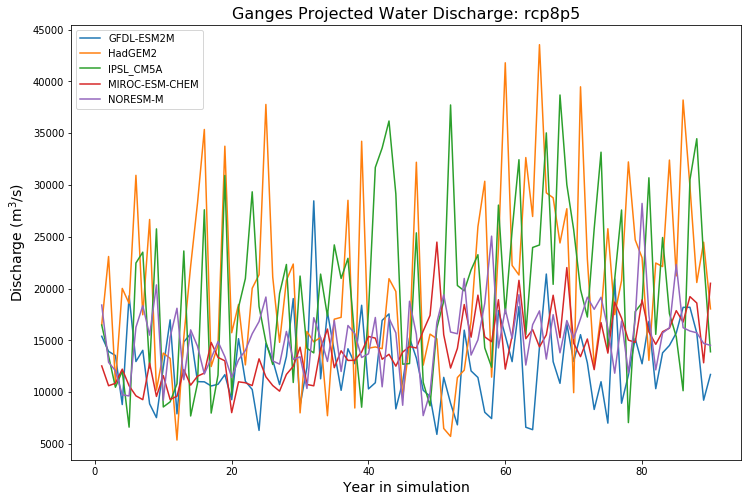

In [9]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qw_mean_rows, color = 'tab:blue', label = 'GFDL-ESM2M')
plt.plot(years, hadgem_qw_mean_rows, color = 'tab:orange', label = 'HadGEM2')
plt.plot(years, ipsl_qw_mean_rows, color = 'tab:green', label = 'IPSL_CM5A')
plt.plot(years, miroc_qw_mean_rows, color = 'tab:red', label = 'MIROC-ESM-CHEM')
plt.plot(years, noresm_qw_mean_rows, color = 'tab:purple', label = 'NORESM-M')
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Discharge (m$^3/$s)', size = 14)
plt.title('Ganges Projected Water Discharge: rcp8p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/ganga_qw_rcp8p5_notrend_color.png')

In [10]:
# calc the trendline for gfdl
z_gfdl = np.polyfit(years, gfdl_qw_mean_rows, 1)
p_gfdl = np.poly1d(z_gfdl)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_gfdl[0],z_gfdl[1]), '(GFDL-ESM2M)')

# calc the trendline for hadgem
z_hadgem = np.polyfit(years, hadgem_qw_mean_rows, 1)
p_hadgem = np.poly1d(z_hadgem)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_hadgem[0],z_hadgem[1]), '(HadGEM2)')

# calc the trendline for ipsl
z_ipsl = np.polyfit(years, ipsl_qw_mean_rows, 1)
p_ipsl = np.poly1d(z_ipsl)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_ipsl[0],z_ipsl[1]), '(IPSL_CM5A)')

# calc the trendline for miroc
z_miroc = np.polyfit(years, miroc_qw_mean_rows, 1)
p_miroc = np.poly1d(z_miroc)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_miroc[0],z_miroc[1]), '(MIROC-ESM-CHEM)')

# calc the trendline for noresm
z_noresm = np.polyfit(years, noresm_qw_mean_rows, 1)
p_noresm = np.poly1d(z_noresm)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_noresm[0],z_noresm[1]), '(NORESM-M)')

y=9.6x+(12401.1) (GFDL-ESM2M)
y=86.2x+(16701.2) (HadGEM2)
y=97.3x+(15435.8) (IPSL_CM5A)
y=83.1x+(10425.4) (MIROC-ESM-CHEM)
y=38.3x+(13617.0) (NORESM-M)


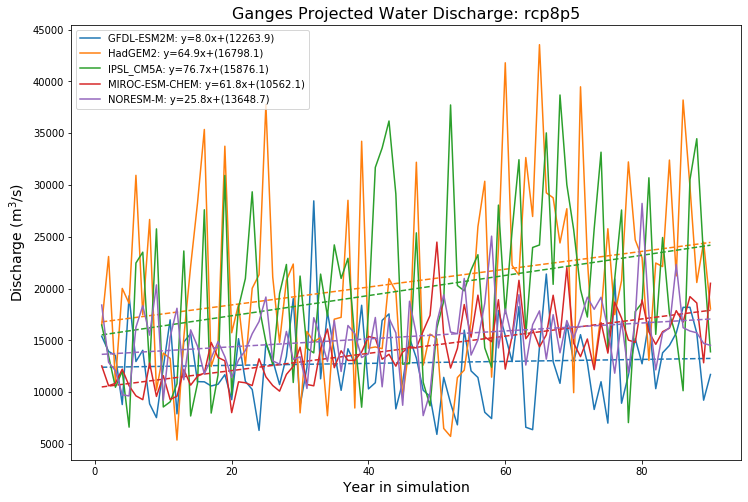

In [11]:
fig, axs = plt.subplots(figsize = (12, 8))

plt.plot(years, gfdl_qw_mean_rows, color = 'tab:blue', label = 'GFDL-ESM2M: y=8.0x+(12263.9)')
pylab.plot(years,p_gfdl(years), color = 'tab:blue', linestyle = 'dashed')

plt.plot(years, hadgem_qw_mean_rows, color = 'tab:orange', label = 'HadGEM2: y=64.9x+(16798.1)')
pylab.plot(years,p_hadgem(years), color = 'tab:orange', linestyle = 'dashed' )

plt.plot(years, ipsl_qw_mean_rows, color = 'tab:green', label = 'IPSL_CM5A: y=76.7x+(15876.1)')
pylab.plot(years,p_ipsl(years), color = 'tab:green', linestyle = 'dashed')

plt.plot(years, miroc_qw_mean_rows, color = 'tab:red', label = 'MIROC-ESM-CHEM: y=61.8x+(10562.1)')
pylab.plot(years,p_miroc(years), color = 'tab:red', linestyle = 'dashed')

plt.plot(years, noresm_qw_mean_rows, color = 'tab:purple', label = 'NORESM-M: y=25.8x+(13648.7)')
pylab.plot(years,p_noresm(years), color = 'tab:purple', linestyle = 'dashed')

plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Discharge (m$^3/$s)', size = 14)
plt.title('Ganges Projected Water Discharge: rcp8p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/ganga_qw_rcp8p5_trend_color.png')

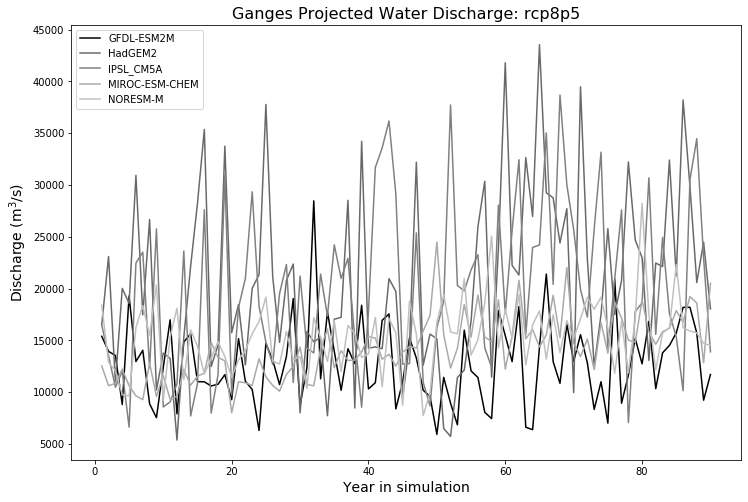

In [12]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qw_mean_rows, color = 'black', label = 'GFDL-ESM2M')
plt.plot(years, hadgem_qw_mean_rows, color = 'dimgray', label = 'HadGEM2')
plt.plot(years, ipsl_qw_mean_rows, color = 'gray', label = 'IPSL_CM5A')
plt.plot(years, miroc_qw_mean_rows, color = 'darkgray', label = 'MIROC-ESM-CHEM')
plt.plot(years, noresm_qw_mean_rows, color = 'silver', label = 'NORESM-M')
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Discharge (m$^3/$s)', size = 14)
plt.title('Ganges Projected Water Discharge: rcp8p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/ganga_qw_rcp8p5_notrend_bw.png')

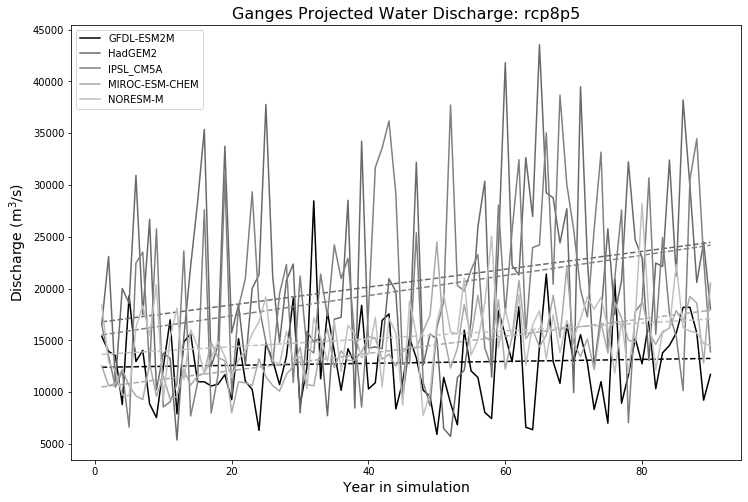

In [13]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qw_mean_rows, color = 'black', label = 'GFDL-ESM2M')
pylab.plot(years,p_gfdl(years), color = 'black', linestyle = 'dashed')

plt.plot(years, hadgem_qw_mean_rows, color = 'dimgray', label = 'HadGEM2')
pylab.plot(years,p_hadgem(years), color = 'dimgray', linestyle = 'dashed' )

plt.plot(years, ipsl_qw_mean_rows, color = 'gray', label = 'IPSL_CM5A')
pylab.plot(years,p_ipsl(years), color = 'gray', linestyle = 'dashed')

plt.plot(years, miroc_qw_mean_rows, color = 'darkgray', label = 'MIROC-ESM-CHEM')
pylab.plot(years,p_miroc(years), color = 'darkgray', linestyle = 'dashed')

plt.plot(years, noresm_qw_mean_rows, color = 'silver', label = 'NORESM-M')
pylab.plot(years,p_noresm(years), color = 'silver', linestyle = 'dashed')

plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Discharge (m$^3/$s)', size = 14)
plt.title('Ganges Projected Water Discharge: rcp8p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/ganga_qw_rcp8p5_trend_bw.png')

## Reshape: Qs

In [14]:
gfdl_qs = np.array(gfdl['Qs(kg/s)'])
gfdl_qs_reshape = gfdl_qs.reshape(90,365)
gfdl_qs_mean_rows = np.mean(gfdl_qs_reshape, axis = 1)

hadgem_qs = np.array(hadgem['Qs(kg/s)'])
hadgem_qs_reshape = hadgem_qs.reshape(90,365)
hadgem_qs_mean_rows = np.mean(hadgem_qs_reshape, axis = 1)

ipsl_qs = np.array(ipsl['Qs(kg/s)'])
ipsl_qs_reshape = ipsl_qs.reshape(90,365)
ipsl_qs_mean_rows = np.mean(ipsl_qs_reshape, axis = 1)

miroc_qs = np.array(miroc['Qs(kg/s)'])
miroc_qs_reshape = miroc_qs.reshape(90,365)
miroc_qs_mean_rows = np.mean(miroc_qs_reshape, axis = 1)

noresm_qs = np.array(noresm['Qs(kg/s)'])
noresm_qs_reshape = noresm_qs.reshape(90,365)
noresm_qs_mean_rows = np.mean(noresm_qs_reshape, axis = 1)

## Plot

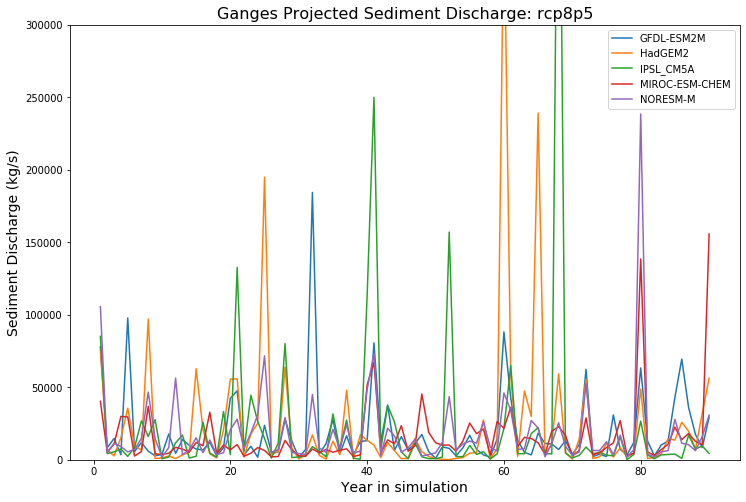

In [15]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qs_mean_rows, color = 'tab:blue', label = 'GFDL-ESM2M')
plt.plot(years, hadgem_qs_mean_rows, color = 'tab:orange', label = 'HadGEM2')
plt.plot(years, ipsl_qs_mean_rows, color = 'tab:green', label = 'IPSL_CM5A')
plt.plot(years, miroc_qs_mean_rows, color = 'tab:red', label = 'MIROC-ESM-CHEM')
plt.plot(years, noresm_qs_mean_rows, color = 'tab:purple', label = 'NORESM-M')
plt.ylim(0, 3e5)
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Sediment Discharge (kg/s)', size = 14)
plt.title('Ganges Projected Sediment Discharge: rcp8p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/ganga_qs_rcp8p5_notrend_color.png')

In [16]:
# calc the trendline for gfdl
z_gfdl = np.polyfit(years, gfdl_qs_mean_rows, 1)
p_gfdl = np.poly1d(z_gfdl)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_gfdl[0],z_gfdl[1]), '(GFDL-ESM2M)')

# calc the trendline for hadgem
z_hadgem = np.polyfit(years, hadgem_qs_mean_rows, 1)
p_hadgem = np.poly1d(z_hadgem)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_hadgem[0],z_hadgem[1]), '(HadGEM2)')

# calc the trendline for ipsl
z_ipsl = np.polyfit(years, ipsl_qs_mean_rows, 1)
p_ipsl = np.poly1d(z_ipsl)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_ipsl[0],z_ipsl[1]), '(IPSL_CM5A)')

# calc the trendline for miroc
z_miroc = np.polyfit(years, miroc_qs_mean_rows, 1)
p_miroc = np.poly1d(z_miroc)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_miroc[0],z_miroc[1]), '(MIROC-ESM-CHEM)')

# calc the trendline for noresm
z_noresm = np.polyfit(years, noresm_qs_mean_rows, 1)
p_noresm = np.poly1d(z_noresm)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_noresm[0],z_noresm[1]), '(NORESM-M)')

y=2.3x+(18868.0) (GFDL-ESM2M)
y=42.3x+(22457.1) (HadGEM2)
y=0.3x+(23898.2) (IPSL_CM5A)
y=187.0x+(7554.6) (MIROC-ESM-CHEM)
y=22.8x+(17856.0) (NORESM-M)


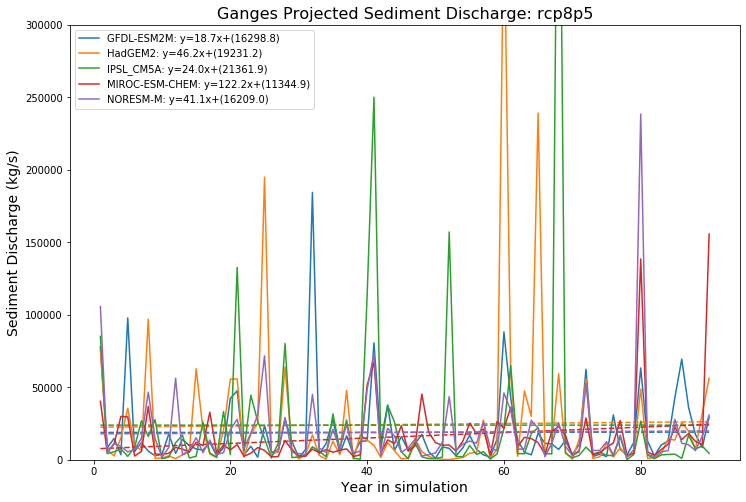

In [17]:
fig, axs = plt.subplots(figsize = (12, 8))

plt.plot(years, gfdl_qs_mean_rows, color = 'tab:blue', label = 'GFDL-ESM2M: y=18.7x+(16298.8)')
pylab.plot(years,p_gfdl(years), color = 'tab:blue', linestyle = 'dashed')

plt.plot(years, hadgem_qs_mean_rows, color = 'tab:orange', label = 'HadGEM2: y=46.2x+(19231.2)')
pylab.plot(years,p_hadgem(years), color = 'tab:orange', linestyle = 'dashed' )

plt.plot(years, ipsl_qs_mean_rows, color = 'tab:green', label = 'IPSL_CM5A: y=24.0x+(21361.9)')
pylab.plot(years,p_ipsl(years), color = 'tab:green', linestyle = 'dashed')

plt.plot(years, miroc_qs_mean_rows, color = 'tab:red', label = 'MIROC-ESM-CHEM: y=122.2x+(11344.9)')
pylab.plot(years,p_miroc(years), color = 'tab:red', linestyle = 'dashed')

plt.plot(years, noresm_qs_mean_rows, color = 'tab:purple', label = 'NORESM-M: y=41.1x+(16209.0)')
pylab.plot(years,p_noresm(years), color = 'tab:purple', linestyle = 'dashed')

plt.ylim(0, 3e5)
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Sediment Discharge (kg/s)', size = 14)
plt.title('Ganges Projected Sediment Discharge: rcp8p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/ganga_qs_rcp8p5_trend_color.png')

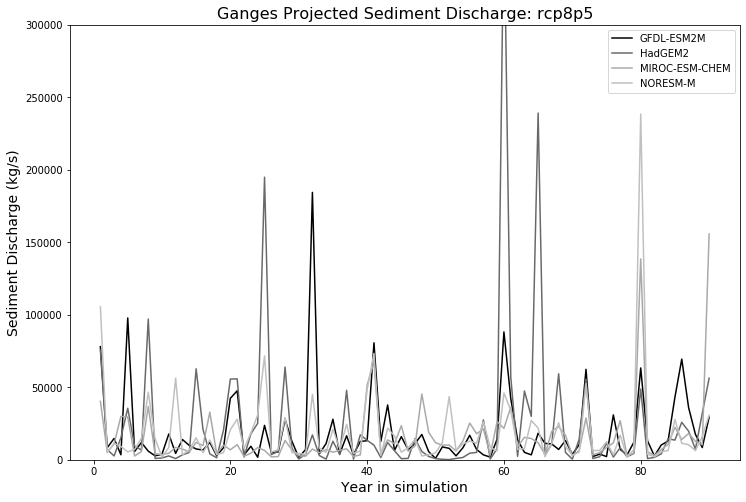

In [18]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qs_mean_rows, color = 'black', label = 'GFDL-ESM2M')
plt.plot(years, hadgem_qs_mean_rows, color = 'dimgray', label = 'HadGEM2')
#plt.plot(years, ipsl_qs_mean_rows, color = 'gray', label = 'IPSL_CM5A')
plt.plot(years, miroc_qs_mean_rows, color = 'darkgray', label = 'MIROC-ESM-CHEM')
plt.plot(years, noresm_qs_mean_rows, color = 'silver', label = 'NORESM-M')
plt.ylim(0, 3e5)
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Sediment Discharge (kg/s)', size = 14)
plt.title('Ganges Projected Sediment Discharge: rcp8p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/ganga_qs_rcp8p5_notrend_bw.png')

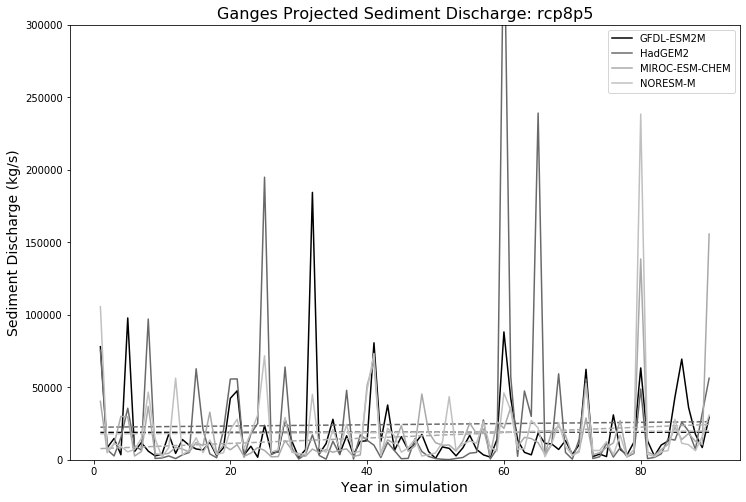

In [19]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qs_mean_rows, color = 'black', label = 'GFDL-ESM2M')
pylab.plot(years,p_gfdl(years), color = 'black', linestyle = 'dashed')

plt.plot(years, hadgem_qs_mean_rows, color = 'dimgray', label = 'HadGEM2')
pylab.plot(years,p_hadgem(years), color = 'dimgray', linestyle = 'dashed' )

#plt.plot(years, ipsl_qs_mean_rows, color = 'gray', label = 'IPSL_CM5A')
#pylab.plot(years,p_ipsl(years), color = 'gray', linestyle = 'dashed')

plt.plot(years, miroc_qs_mean_rows, color = 'darkgray', label = 'MIROC-ESM-CHEM')
pylab.plot(years,p_miroc(years), color = 'darkgray', linestyle = 'dashed')

plt.plot(years, noresm_qs_mean_rows, color = 'silver', label = 'NORESM-M')
pylab.plot(years,p_noresm(years), color = 'silver', linestyle = 'dashed')

plt.ylim(0, 3e5)
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Sediment Discharge (kg/s)', size = 14)
plt.title('Ganges Projected Sediment Discharge: rcp8p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/ganga_qs_rcp8p5_trend_bw.png')

# Part 2: Calculate average water and sediment discharge and annual sediment discharge for each time period

## Import Summary Statistics

### GFDL-ESM2M

In [20]:
gfdl_2000 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/reference/GFDL-ESM2M/summ_stats_v3.csv'))
gfdl_2020 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/GFDL-ESM2M/2020/summ_stats_v3.csv'))
gfdl_2040 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/GFDL-ESM2M/2040/summ_stats_v3.csv'))
gfdl_2060 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/GFDL-ESM2M/2060/summ_stats_v3.csv'))
gfdl_2080 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/GFDL-ESM2M/2080/summ_stats_v3.csv'))

frames_gfdl = [gfdl_2000, gfdl_2020, gfdl_2040, gfdl_2060, gfdl_2080]
concat_gfdl = pd.concat(frames_gfdl)
concat_gfdl.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])
concat_gfdl

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,13017.698044,15823.171285,0.276107,273.218144,123409.005920,2.102326e+06,21.936817,2590.133784,20544.226165,...,1848.465062,12.681129,0.008015,38.795968,46181.216834,32148.511583,0.675900,969.260947,220,217
0,2020,12279.816098,16159.923726,0.264456,257.731324,140907.087976,3.277494e+06,25.034157,2957.387155,20009.311992,...,1674.094060,10.658734,0.007543,35.136233,42976.183994,28960.379762,0.674438,901.993053,220,214
0,2040,13070.066906,17148.653663,0.258552,274.317272,156104.839430,4.266616e+06,27.625011,3276.360712,21673.316639,...,1941.279452,13.129653,0.008451,40.743975,45034.773038,27189.149886,0.586462,945.199147,210,156
0,2060,12244.941867,17387.843705,0.286352,256.999377,131276.872155,3.008249e+06,30.377552,2755.266191,20523.347451,...,1797.706901,14.621773,0.009962,37.730645,43354.361406,29541.611644,0.663261,909.930319,185,212
0,2080,13393.301101,19015.603373,0.275864,281.101378,176431.799474,3.112008e+06,28.729805,3702.987160,23464.623738,...,1627.994864,12.910573,0.008966,34.168693,46181.520851,30686.088944,0.649279,969.267327,196,195


In [21]:
gfdl_change = ((gfdl_2080 - gfdl_2000)/gfdl_2000)*100
concat_gfdl = concat_gfdl.append(gfdl_change)
concat_gfdl.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,13017.69804,15823.17128,0.27611,273.21814,123409.00592,2.102326e+06,21.93682,2590.13378,20544.22617,...,1848.46506,12.68113,0.00802,38.79597,46181.21683,32148.51158,0.67590,969.26095,220.00000,217.00000
0,2020,12279.81610,16159.92373,0.26446,257.73132,140907.08798,3.277494e+06,25.03416,2957.38716,20009.31199,...,1674.09406,10.65873,0.00754,35.13623,42976.18399,28960.37976,0.67444,901.99305,220.00000,214.00000
0,2040,13070.06691,17148.65366,0.25855,274.31727,156104.83943,4.266616e+06,27.62501,3276.36071,21673.31664,...,1941.27945,13.12965,0.00845,40.74398,45034.77304,27189.14989,0.58646,945.19915,210.00000,156.00000
0,2060,12244.94187,17387.84371,0.28635,256.99938,131276.87215,3.008249e+06,30.37755,2755.26619,20523.34745,...,1797.70690,14.62177,0.00996,37.73064,43354.36141,29541.61164,0.66326,909.93032,185.00000,212.00000
0,2080,13393.30110,19015.60337,0.27586,281.10138,176431.79947,3.112008e+06,28.72980,3702.98716,23464.62374,...,1627.99486,12.91057,0.00897,34.16869,46181.52085,30686.08894,0.64928,969.26733,196.00000,195.00000
0,NaN,2.88533,20.17568,-0.08805,2.88533,42.96509,4.802688e+01,30.96615,42.96509,14.21517,...,-11.92720,1.80934,11.86043,-11.92720,0.00066,-4.54896,-3.93866,0.00066,-10.90909,-10.13825


### HadGEM2

In [22]:
hadgem_2000 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/reference/HadGEM2/summ_stats_v3.csv'))
hadgem_2020 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/HadGEM2/2020/summ_stats_v3.csv'))
hadgem_2040 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/HadGEM2/2040/summ_stats_v3.csv'))
hadgem_2060 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/HadGEM2/2060/summ_stats_v3.csv'))
hadgem_2080 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/HadGEM2/2080/summ_stats_v3.csv'))

frames_hadgem = [hadgem_2000, hadgem_2020, hadgem_2040, hadgem_2060, hadgem_2080]
concat_hadgem = pd.concat(frames_hadgem)
concat_hadgem.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])

In [23]:
hadgem_change = ((hadgem_2080 - hadgem_2000)/hadgem_2000)*100
concat_hadgem = concat_hadgem.append(hadgem_change)
concat_hadgem.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,12923.84757,15616.41175,0.15207,271.24839,245588.56054,4.426612e+06,18.22515,5154.46359,27723.75624,...,1178.05960,1.79148,0.00162,24.72536,45393.76494,11463.86443,0.25031,952.73374,227.00000,189.00000
0,2020,19411.91786,19702.91486,0.16366,407.42135,271331.15371,2.376823e+06,12.89808,5694.75447,38729.43897,...,1296.82633,1.80349,0.00148,27.21806,74535.25650,23916.21103,0.31191,1564.36141,255.00000,261.00000
0,2040,17971.67556,19822.94349,0.17117,377.19325,258752.20084,6.501341e+06,25.12574,5430.74480,33740.10391,...,1434.25565,2.41262,0.00179,30.10245,68634.62175,22243.68308,0.31867,1440.51766,205.00000,260.00000
0,2060,20668.82011,22528.07777,0.15168,433.80148,351932.04759,7.036393e+06,31.48593,7386.42273,40829.82476,...,1497.80791,1.75548,0.00132,31.43630,75732.01069,16487.02185,0.22163,1589.47913,226.00000,270.00000
0,2080,24852.57290,26048.92828,0.16525,521.61095,354572.50174,6.649761e+06,20.57080,7441.84113,45736.05951,...,1551.61516,2.33361,0.00176,32.56562,95012.32649,23162.56926,0.25476,1994.13839,218.00000,259.00000
0,NaN,92.30011,66.80482,8.66875,92.30011,44.37664,5.022236e+01,12.87041,44.37664,64.97065,...,31.70939,30.26131,8.59757,31.70939,109.30700,102.04853,1.77853,109.30700,-3.96476,37.03704


### IPSL_CM5A

In [24]:
ipsl_2000 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/reference/IPSL_CM5A/summ_stats_v3.csv'))
ipsl_2020 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/IPSL_CM5A/2020/summ_stats_v3.csv'))
ipsl_2040 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/IPSL_CM5A/2040/summ_stats_v3.csv'))
ipsl_2060 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/IPSL_CM5A/2060/summ_stats_v3.csv'))
ipsl_2080 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/IPSL_CM5A/2080/summ_stats_v3.csv'))

frames_ipsl = [ipsl_2000, ipsl_2020, ipsl_2040, ipsl_2060, ipsl_2080]
concat_ipsl = pd.concat(frames_ipsl)
concat_ipsl.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])

In [25]:
ipsl_change = ((ipsl_2080 - ipsl_2000)/ipsl_2000)*100
concat_ipsl = concat_ipsl.append(ipsl_change)
concat_ipsl.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,14399.11618,16751.55180,0.08680,302.21163,391012.67916,1.463958e+07,41.93015,8206.65512,36428.18037,...,1766.73375,1.32829,0.00086,37.08057,43057.15231,3554.59994,0.07843,903.69243,216.00000,217.00000
0,2020,16281.49792,18633.82489,0.16570,341.71945,348475.59168,3.169060e+06,22.61278,7313.87791,36571.69296,...,2024.29544,6.25830,0.00345,42.48633,52586.05316,16151.32355,0.29906,1103.68698,218.00000,212.00000
0,2040,19343.45075,21345.18635,0.14425,405.98435,336498.27568,6.978835e+06,31.62491,7062.49553,41594.86238,...,2072.73074,3.15896,0.00180,43.50290,66993.50503,12889.11402,0.17952,1406.07356,216.00000,212.00000
0,2060,23447.33642,24919.85048,0.14771,492.11755,446421.97310,9.300494e+06,34.13759,9369.59686,47243.31806,...,1903.69984,2.92959,0.00165,39.95525,87352.99659,15758.13920,0.18329,1833.38279,215.00000,212.00000
0,2080,22993.23777,26353.07997,0.12038,482.58684,445979.91729,2.458859e+07,55.13386,9360.31890,45671.64497,...,1592.47108,2.50359,0.00156,33.42311,87971.94154,14068.04716,0.15727,1846.37334,215.00000,170.00000
0,NaN,59.68506,57.31725,38.67813,59.68506,14.05766,6.795972e+01,31.48977,14.05766,25.37449,...,-9.86355,88.48172,81.82181,-9.86355,104.31435,295.77020,100.53323,104.31435,-0.46296,-21.65899


### MIROC-ESM-CHEM

In [26]:
miroc_2000 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/reference/MIROC-ESM-CHEM/summ_stats_v3.csv'))
miroc_2020 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/MIROC-ESM-CHEM/2020/summ_stats_v3.csv'))
miroc_2040 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/MIROC-ESM-CHEM/2040/summ_stats_v3.csv'))
miroc_2060 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/MIROC-ESM-CHEM/2060/summ_stats_v3.csv'))
miroc_2080 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/MIROC-ESM-CHEM/2080/summ_stats_v3.csv'))

frames_miroc = [miroc_2000, miroc_2020, miroc_2040, miroc_2060, miroc_2080]
concat_miroc = pd.concat(frames_miroc)
concat_miroc.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])

In [27]:
miroc_change = ((miroc_2080 - miroc_2000)/miroc_2000)*100
concat_miroc = concat_miroc.append(miroc_change)
concat_miroc.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,11315.39171,14826.65547,0.29621,237.48979,109562.83023,1.532940e+06,18.67134,2299.52738,18204.50788,...,1508.86359,11.30854,0.00841,31.66834,40794.92699,35930.90149,0.86749,856.21238,227.00000,228.00000
0,2020,11311.64100,15587.51727,0.27222,237.41106,120633.44387,5.678335e+06,51.01107,2531.87971,18377.49976,...,1727.73869,11.51693,0.00795,36.26214,39787.30142,25776.95736,0.63101,835.06413,213.00000,234.00000
0,2040,13450.12094,17565.22202,0.19787,282.29392,193635.71182,6.286104e+06,36.94466,4064.06644,23158.40642,...,1729.83419,6.12687,0.00433,36.30612,46478.81187,16417.71009,0.36363,975.50693,208.00000,246.00000
0,2060,16011.82492,20127.78204,0.26708,336.05950,228509.02368,3.221912e+06,23.66009,4795.99473,27784.58056,...,1833.55949,11.57380,0.00745,38.48313,55183.88151,39878.40950,0.70129,1158.21074,208.00000,234.00000
0,2080,16429.30179,21661.89775,0.26271,344.82159,178851.33951,6.189525e+06,40.61244,3753.76897,26990.61370,...,1741.34511,9.94261,0.00648,36.54771,58892.17877,33187.52128,0.57533,1236.04125,223.00000,238.00000
0,NaN,45.19428,46.10104,-11.30835,45.19428,63.24089,3.037683e+02,117.51221,63.24089,48.26335,...,15.40772,-12.07875,-23.01981,15.40772,44.36153,-7.63516,-33.67864,44.36153,-1.76211,4.38596


### NORESM-M

In [28]:
noresm_2000 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/reference/NORESM-M/summ_stats_v3.csv'))
noresm_2020 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/NORESM-M/2020/summ_stats_v3.csv'))
noresm_2040 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/NORESM-M/2040/summ_stats_v3.csv'))
noresm_2060 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/NORESM-M/2060/summ_stats_v3.csv'))
noresm_2080 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Ganga/rcp8p5/NORESM-M/2080/summ_stats_v3.csv'))

frames_noresm = [noresm_2000, noresm_2020, noresm_2040, noresm_2060, noresm_2080]
concat_noresm = pd.concat(frames_noresm)
concat_noresm.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])

In [29]:
noresm_change = ((noresm_2080 - noresm_2000)/noresm_2000)*100
concat_noresm = concat_noresm.append(noresm_change)
concat_noresm.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,12311.47649,15309.80316,0.27214,258.39582,128654.55820,1.911385e+06,22.42608,2700.22852,19853.27845,...,1589.82729,9.21481,0.00668,33.36762,46111.92662,32565.11783,0.71750,967.80667,228.00000,217.00000
0,2020,14312.32677,17058.96908,0.25024,300.39008,126626.43687,2.610130e+06,24.26850,2657.66189,23404.89839,...,1797.06902,9.28051,0.00595,37.71726,52020.53656,30879.50681,0.58997,1091.81780,215.00000,207.00000
0,2040,14274.34922,17753.08454,0.27938,299.59300,125986.01516,1.874188e+06,15.48216,2644.22059,23233.84481,...,1784.85553,10.18162,0.00673,37.46092,53315.48406,38252.71370,0.70767,1118.99643,220.00000,217.00000
0,2060,15754.58645,19274.58145,0.27319,330.66052,151669.61814,2.225821e+06,18.41516,3183.27337,25815.20516,...,2012.65925,12.95183,0.00785,42.24211,58491.37335,38146.13853,0.64719,1227.62906,215.00000,212.00000
0,2080,16488.30700,20706.19636,0.23461,346.06000,168576.55603,6.087805e+06,37.57552,3538.11968,27449.40275,...,1912.15593,7.57012,0.00485,40.13272,60470.99453,29581.43164,0.49117,1269.17776,214.00000,187.00000
0,NaN,33.92632,35.24796,-13.78818,33.92632,31.03038,2.185023e+02,67.55274,31.03038,38.26131,...,20.27444,-17.84829,-27.42086,20.27444,31.13960,-9.16222,-31.54424,31.13960,-6.14035,-13.82488


### Average Water Discharge

In [30]:
avg_qw_ref = (gfdl_2000['Mean Qw']+hadgem_2000['Mean Qw']+ipsl_2000['Mean Qw']+miroc_2000['Mean Qw']+noresm_2000['Mean Qw'])/5
avg_qw_2020 = (gfdl_2020['Mean Qw']+hadgem_2020['Mean Qw']+ipsl_2020['Mean Qw']+miroc_2020['Mean Qw']+noresm_2020['Mean Qw'])/5
avg_qw_2040 = (gfdl_2040['Mean Qw']+hadgem_2040['Mean Qw']+ipsl_2040['Mean Qw']+miroc_2040['Mean Qw']+noresm_2040['Mean Qw'])/5
avg_qw_2060 = (gfdl_2060['Mean Qw']+hadgem_2060['Mean Qw']+ipsl_2060['Mean Qw']+miroc_2060['Mean Qw']+noresm_2060['Mean Qw'])/5
avg_qw_2080 = (gfdl_2080['Mean Qw']+hadgem_2080['Mean Qw']+ipsl_2080['Mean Qw']+miroc_2080['Mean Qw']+noresm_2080['Mean Qw'])/5

In [31]:
print(np.asarray(avg_qw_ref).round(0), 'm^3/s')
print(np.asarray(avg_qw_2020).round(0), 'm^3/s')
print(np.asarray(avg_qw_2040).round(0), 'm^3/s')
print(np.asarray(avg_qw_2060).round(0), 'm^3/s')
print(np.asarray(avg_qw_2080).round(0), 'm^3/s')

[12794.] m^3/s
[14719.] m^3/s
[15622.] m^3/s
[17626.] m^3/s
[18831.] m^3/s


### Average Sediment Discharge

In [32]:
avg_qs_ref = (gfdl_2000['Mean Qs']+hadgem_2000['Mean Qs']+ipsl_2000['Mean Qs']+miroc_2000['Mean Qs']+noresm_2000['Mean Qs'])/5
avg_qs_2020 = (gfdl_2020['Mean Qs']+hadgem_2020['Mean Qs']+ipsl_2020['Mean Qs']+miroc_2020['Mean Qs']+noresm_2020['Mean Qs'])/5
avg_qs_2040 = (gfdl_2040['Mean Qs']+hadgem_2040['Mean Qs']+ipsl_2040['Mean Qs']+miroc_2040['Mean Qs']+noresm_2040['Mean Qs'])/5
avg_qs_2060 = (gfdl_2060['Mean Qs']+hadgem_2060['Mean Qs']+ipsl_2060['Mean Qs']+miroc_2060['Mean Qs']+noresm_2060['Mean Qs'])/5
avg_qs_2080 = (gfdl_2080['Mean Qs']+hadgem_2080['Mean Qs']+ipsl_2080['Mean Qs']+miroc_2080['Mean Qs']+noresm_2080['Mean Qs'])/5

In [33]:
print(np.asarray(avg_qs_ref).round(0), 'kg/s')
print(np.asarray(avg_qs_2020).round(0), 'kg/s')
print(np.asarray(avg_qs_2040).round(0), 'kg/s')
print(np.asarray(avg_qs_2060).round(0), 'kg/s')
print(np.asarray(avg_qs_2080).round(0), 'kg/s')

[15666.] kg/s
[17429.] kg/s
[18727.] kg/s
[20848.] kg/s
[22757.] kg/s


### Average SSC

In [34]:
avg_SSC_ref = (gfdl_2000['Mean SSC']+hadgem_2000['Mean SSC']+ipsl_2000['Mean SSC']+miroc_2000['Mean SSC']+noresm_2000['Mean SSC'])/5
avg_SSC_2020 = (gfdl_2020['Mean SSC']+hadgem_2020['Mean SSC']+ipsl_2020['Mean SSC']+miroc_2020['Mean SSC']+noresm_2020['Mean SSC'])/5
avg_SSC_2040 = (gfdl_2040['Mean SSC']+hadgem_2040['Mean SSC']+ipsl_2040['Mean SSC']+miroc_2040['Mean SSC']+noresm_2040['Mean SSC'])/5
avg_SSC_2060 = (gfdl_2060['Mean SSC']+hadgem_2060['Mean SSC']+ipsl_2060['Mean SSC']+miroc_2060['Mean SSC']+noresm_2060['Mean SSC'])/5
avg_SSC_2080 = (gfdl_2080['Mean SSC']+hadgem_2080['Mean SSC']+ipsl_2080['Mean SSC']+miroc_2080['Mean SSC']+noresm_2080['Mean SSC'])/5

In [35]:
print(np.asarray(avg_SSC_ref).round(3), 'kg/m3')
print(np.asarray(avg_SSC_2020).round(3), 'kg/m3')
print(np.asarray(avg_SSC_2040).round(3), 'kg/m3')
print(np.asarray(avg_SSC_2060).round(3), 'kg/m3')
print(np.asarray(avg_SSC_2080).round(3), 'kg/m3')

[0.217] kg/m3
[0.223] kg/m3
[0.21] kg/m3
[0.225] kg/m3
[0.212] kg/m3


### Annual Sediment Discharge

In [36]:
print(np.asarray(avg_qs_ref*3.14e7/1e9).round(0), 'MT/yr')
print(np.asarray(avg_qs_2020*3.14e7/1e9).round(0), 'MT/yr')
print(np.asarray(avg_qs_2040*3.14e7/1e9).round(0), 'MT/yr')
print(np.asarray(avg_qs_2060*3.14e7/1e9).round(0), 'MT/yr')
print(np.asarray(avg_qs_2080*3.14e7/1e9).round(0), 'MT/yr')

[492.] MT/yr
[547.] MT/yr
[588.] MT/yr
[655.] MT/yr
[715.] MT/yr


## Part 3: Calculate annual present-day Qs using new rating curve

In [37]:
# this is one year of discharge data: 2019-2020 
# dataset starts in 2006, so 2019-2006 = 13, 13*365 = 4745, 4745+365 = 5110)

gfdl_qw = gfdl['Qw(m3/s)'][4745:5110]
hadgem_qw = hadgem['Qw(m3/s)'][4745:5110]
ipsl_qw = ipsl['Qw(m3/s)'][4745:5110]
miroc_qw = miroc['Qw(m3/s)'][4745:5110]
noresm_qw = noresm['Qw(m3/s)'][4745:5110]

In [38]:
# print mean water dishcarge for 2019

print('{:.6} cms (GFDL_ESM2M)'.format(gfdl_qw.mean()))
print('{:.6} cms (HadGEM2)'.format(hadgem_qw.mean()))
print('{:.6} cms (IPSL_CM5A)'.format(ipsl_qw.mean()))
print('{:.6} cms (MIROC-ESM-CHEM)'.format(miroc_qw.mean()))
print('{:.6} cms (NORESM-M)'.format(noresm_qw.mean()))

15650.8 cms (GFDL_ESM2M)
22180.4 cms (HadGEM2)
7706.8 cms (IPSL_CM5A)
10681.5 cms (MIROC-ESM-CHEM)
16018.5 cms (NORESM-M)


In [39]:
# this is one year of ssc data in mg/l, using rating curve from IWM data

gfdl_cs_mgl = 0.002089*gfdl_qw**1.233509
hadgem_cs_mgl = 0.002089*hadgem_qw**1.233509
ipsl_cs_mgl = 0.002089*ipsl_qw**1.233509
miroc_cs_mgl = 0.002089*miroc_qw**1.233509
noresm_cs_mgl = 0.002089*noresm_qw**1.233509

In [40]:
# convert ssc from mg/l to kg/m3

gfdl_cs_kgm3 = gfdl_cs_mgl*1e-6/1e-3
hadgem_cs_kgm3 = hadgem_cs_mgl*1e-6/1e-3
ipsl_cs_kgm3 = ipsl_cs_mgl*1e-6/1e-3
miroc_cs_kgm3 = miroc_cs_mgl*1e-6/1e-3
noresm_cs_kgm3 = noresm_cs_mgl*1e-6/1e-3

In [41]:
# this is one year of qs data in kg/day

gfdl_qs = (gfdl_qw * gfdl_cs_kgm3)*60*60*24
hadgem_qs = (hadgem_qw * hadgem_cs_kgm3)*60*60*24
ipsl_qs = (ipsl_qw * ipsl_cs_kgm3)*60*60*24
miroc_qs = (miroc_qw * miroc_cs_kgm3)*60*60*24
noresm_qs = (noresm_qw * noresm_cs_kgm3)*60*60*24

In [42]:
# sum sediment load over a year to obtain kg/year

gfdl_annual_qs_kg = gfdl_qs.sum()
hadgem_annual_qs_kg = hadgem_qs.sum()
ipsl_annual_qs_kg = ipsl_qs.sum()
miroc_annual_qs_kg = miroc_qs.sum()
noresm_annual_qs_kg = noresm_qs.sum()

In [43]:
# convert qs from kg/year to MT/yr

gfdl_annual_qs_mt = gfdl_annual_qs_kg/1e9
hadgem_annual_qs_mt = hadgem_annual_qs_kg/1e9
ipsl_annual_qs_mt = ipsl_annual_qs_kg/1e9
miroc_annual_qs_mt = miroc_annual_qs_kg/1e9
noresm_annual_qs_mt = noresm_annual_qs_kg/1e9

In [44]:
# print annual Qs results

print('{:.4} MT/yr (GFDL_ESM2M)'.format(gfdl_annual_qs_mt))
print('{:.5} MT/yr (HadGEM2)'.format(hadgem_annual_qs_mt))
print('{:.4} MT/yr (IPSL_CM5A)'.format(ipsl_annual_qs_mt))
print('{:.4} MT/yr (MIROC-ESM-CHEM)'.format(miroc_annual_qs_mt))
print('{:.4} MT/yr (NORESM-M)'.format(noresm_annual_qs_mt))

709.6 MT/yr (GFDL_ESM2M)
1811.1 MT/yr (HadGEM2)
286.9 MT/yr (IPSL_CM5A)
340.7 MT/yr (MIROC-ESM-CHEM)
762.6 MT/yr (NORESM-M)
